<a href="https://colab.research.google.com/github/zmiern/ie423/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting current value of a football player
### Why a certain model between two (such as decision tree or random forest – or any other two models) works better than the other for this specific data set.



## Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/final_data 3.csv')

In [ ]:
dfMlb.columns.tolist()

['player',
 'team',
 'name',
 'position',
 'height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded',
 'winger']

## Select Data

### Select a prediction target
In our case, we want to predict current value of the Player.

In [ ]:
y = dfMlb.loc[:,['current_value']]

### Choose "Features"
In our case, we want to choose the features related to our current value.

In [ ]:
X = dfMlb.loc[:,['player','team','name','position','height','age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured','award','highest_value','position_encoded','winger']]

In [ ]:
# View top few rows
X.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,0.0,1.217252,0.335463,9390,42,5,13,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,0.0,1.242331,0.207055,1304,510,58,1,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.0,0.616438,0.924658,292,697,84,4,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.0,0.000000,0.000000,6408,175,22,9,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.0,0.000000,0.000000,5031,238,51,21,80000000,2,0


In [ ]:
# Describe columns using basic stats
X.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,2.000000e+08,4.000000,1.000000


## Build Model

#### Define

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



'Player', 'Team', 'Name', 'Position' columns include string values. It is better to drop those columns. We also exclude 'current_value'. Moreover, we need to check if our data has any NaN values.

In [ ]:
dfMlb = dfMlb.drop(columns=['team', 'name', 'player', 'position', 'current_value'])
dfMlb.isna().sum()


height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [ ]:
dfMlb.columns.tolist()

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'highest_value',
 'position_encoded',
 'winger']

In [ ]:
X = dfMlb

#### Fit

In [ ]:
# Fix the seed to the random number generator to ensure same results each run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

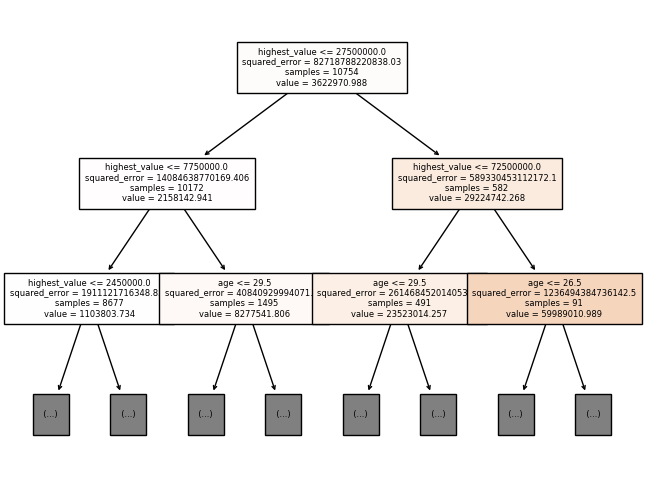

In [ ]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

#### Predict

In [ ]:
print('First few players:')
print(X.head())
print('Price predictions:')
print(mdlDtrMlb.predict(X.head()))

First few players:
   height   age  appearance     goals   assists  yellow cards  \
0   189.0  32.0         104  0.000000  0.000000      0.009585   
1   196.0  30.0          15  0.000000  0.000000      0.069018   
2   188.0  37.0           4  0.000000  0.000000      0.000000   
3   175.0  25.0          82  0.028090  0.056180      0.224719   
4   191.0  30.0          63  0.017889  0.017889      0.053667   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   
1                  0.0        0.0        1.242331      0.207055   
2                  0.0        0.0        0.616438      0.924658   
3                  0.0        0.0        0.000000      0.000000   
4                  0.0        0.0        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  highest_value  \
0            9390            42              5     13       70000000   
1            1304           510            

In [ ]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


#### Evaluate


In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = tree_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

mae_in = mean_absolute_error(y_train, tree_model.predict(X_train))
print("MAE(in-sample score): {mae_in}".format(mae_in=mae_in))
print("MAE(after test-trains split): {mae}".format(mae=mae))

MAE(in-sample score): 2.90596303615018
MAE(after test-trains split): 1292577.870757787


utexas_ds_orie_divider_gray.png

## Improve Decision Tree Model


In [ ]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrMlbDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [ ]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 10, 50, 100, 150, 200, 400, 500, 1000, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2231256.935260474
Max leaf nodes:  10 	 Mean Absolute Error:  1961395.389350545
Max leaf nodes:  50 	 Mean Absolute Error:  1273279.2927822024
Max leaf nodes:  100 	 Mean Absolute Error:  1285647.0951476486
Max leaf nodes:  150 	 Mean Absolute Error:  1227616.1647823711
Max leaf nodes:  200 	 Mean Absolute Error:  1225776.3937131185
Max leaf nodes:  400 	 Mean Absolute Error:  1227718.946073201
Max leaf nodes:  500 	 Mean Absolute Error:  1226044.2338155662
Max leaf nodes:  1000 	 Mean Absolute Error:  1236389.3266178374
Max leaf nodes:  50000 	 Mean Absolute Error:  1255432.3570432358


The best depth of the tree is at 200 max leaf nodes.

## Build Ensemble Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
forest_model = RandomForestRegressor(random_state=1, n_estimators=200)

# Fit model
forest_model.fit(X_train, y_train)

# Predict
y_pred_rf = forest_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean absolute error(RF): {mae_rf:.2f}")


<ipython-input-101-4e4c61f2f0a0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


Mean absolute error(RF): 998509.39


As can be seen, Random Forest has a smaller value for MAE. Why it is better? Random Forest model uses many trees, and it makes a prediction by averaging the predictions of each component tree, thus reduces overfitting while decision trees are prone to overfitting. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

utexas_ds_orie_divider_gray.png